In [1]:
import numpy as np
import pandas as pd
import xgboost as xb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = data.data
y = data.target
cols = data.feature_names

# Split data in test & train

In [3]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X,y)

# Create Training & Test DMatrix

In [4]:
import xgboost as xb

dTrainMatrix = xb.DMatrix(data=trainX, label=trainY)
dTestMatrix = xb.DMatrix(data=testX, label=testY)

params = {"learning_rate":"0.9", "objective":"reg:linear", "n_estimators":"10"}

# Train the Model and Predict 

In [5]:
xb_reg_cl = xb.train(params=params, dtrain=dTrainMatrix)
predictedY = xb_reg_cl.predict(data=dTestMatrix)

# Calculate RMSE

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
rmse = np.sqrt(mean_squared_error(testY, predictedY))
rmse

4.039835564424739

# Tune Regularisation parameters with XGBoost

# Trying L1 regularisation

In [8]:
dTrainMatrix = xb.DMatrix(data=trainX, label=trainY)
dTestMatrix = xb.DMatrix(data=testX, label=testY)

params = {"learning_rate":"0.9", "objective":"reg:linear", "n_estimators":"5"}

# Note on Cross Validation

    xgboost.cv() would train the model but it does not return the model. It is typically used to find the right parameters and once those are known, we can do regular xgboost.train() and xgboost.predict()

In [9]:
l1_params = [1,10,100,1000]
rmse = []

for l1 in l1_params:
    params['alpha']=l1
    
    cv_results = xb.cv(params=params, dtrain=dTrainMatrix, num_boost_round=5, nfold=5, metrics='rmse', as_pandas=True)
    #print (cv_results['test-rmse-std'][9])
    rmse.append(cv_results['test-rmse-std'][4])
    
print (rmse)

[0.3787755809032045, 0.5710491815599075, 0.6339205250264105, 1.2755054723593469]


In [10]:
params = {"learning_rate":"0.9", "objective":"reg:linear", "n_estimators":"5","alpha":"1"}
model = xb.train(params=params, dtrain=dTrainMatrix, num_boost_round=5)

In [11]:
predictedY = model.predict(data=dTestMatrix)

In [12]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(testY, predictedY)
rmse = np.sqrt(mse)
print ('RMSE is :', rmse)

RMSE is : 4.299571893686497


# Plot Feature Importance

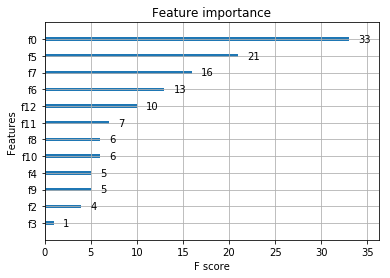

In [13]:
#xb.plot_tree(model)
xb.plot_importance(model)